In [8]:
# Data Processing
import pandas as pd
from sklearn.svm import SVC

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

# Code comparison
import time
import pickle

import warnings
warnings.filterwarnings("ignore")

# REQUIREMENT: RUN FUNCTIONS IN APPENDIX A called svm_perprocessing
df, X, y = svm_perprocessing()

List of all posible variables
['age', 'fnlwgt', 'educationNum', 'hoursPerWeek', 'netCapital', 'isWhite', 'isMarried', 'isHusband', 'USA', 'sex_Male', 'jobtype_government', 'jobtype_other', 'jobtype_private']

Summary Statistics for the Response Variable: `INCOME`
Average Income (Mean):  0.241
Standard Deviation Income:  0.428
Mim Income:  0.000
Max Income:  1.000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [2]:
linear_ = pickle.load(open("./models/linear_gsv_grid_020920.pkl", 'rb'))
rbf_ = pickle.load(open("./models/rbf_gsv_grid_020920.pkl", 'rb'))

In [23]:
rbf_

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('cls', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
          fit_params=None, iid='warn', n_iter=12, n_jobs=-1,
          param_distributions={'cls__kernel': ['rbf', 'linear'], 'cls__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001394109CDA0>, 'cls__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001394109E470>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
start = time.time()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
# Code Credit: https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=101.72732797426653, kernel='rbf', degree=3, gamma=0.028575165238233047) # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

from sklearn import metrics as mt
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


accuracy: 0.8387839705204975
[[4710  256]
 [ 794  753]]


In [32]:
# Code Credit: https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
df_tested_on = X_train.copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['Income_over_50k'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
X['Income_over_50k'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9739 entries, 15282 to 2732
Data columns (total 14 columns):
age                   9739 non-null int64
fnlwgt                9739 non-null int64
educationNum          9739 non-null int64
hoursPerWeek          9739 non-null int64
netCapital            9739 non-null int64
isWhite               9739 non-null float64
isMarried             9739 non-null float64
isHusband             9739 non-null float64
USA                   9739 non-null float64
sex_Male              9739 non-null uint8
jobtype_government    9739 non-null uint8
jobtype_other         9739 non-null uint8
jobtype_private       9739 non-null uint8
Income_over_50k       2938 non-null float64
dtypes: float64(5), int64(5), uint8(4)
memory usage: 875.0 KB


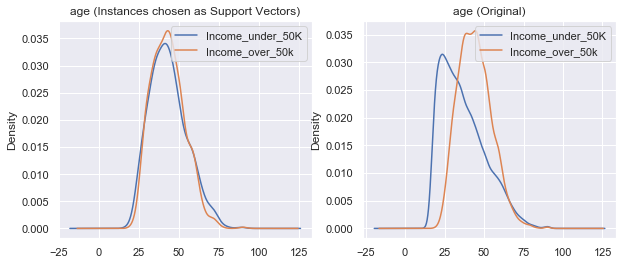

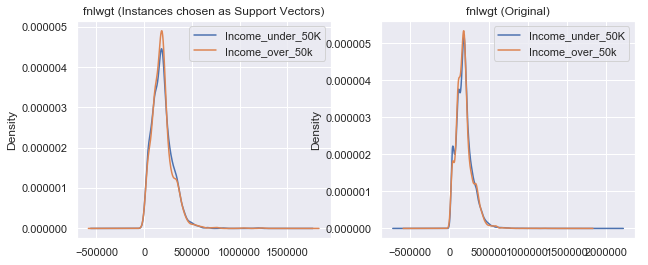

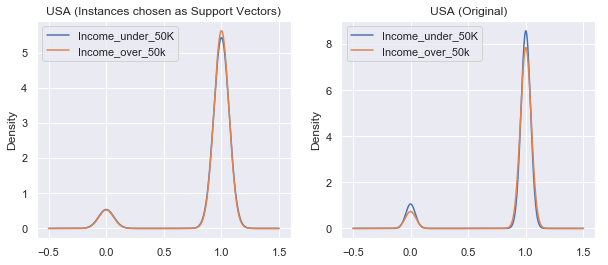

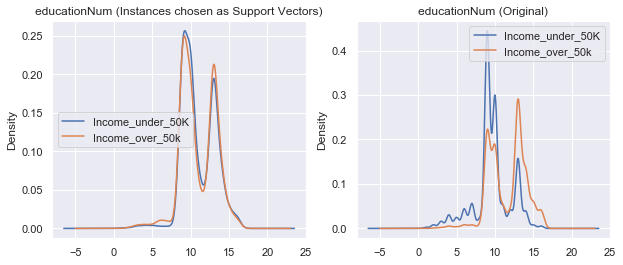

In [33]:
# Code Credit: https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Income_over_50k'])
df_grouped = X.groupby(['Income_over_50k'])

# plot KDE of Different variables
vars_to_plot = ['age','fnlwgt','USA','educationNum']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Income_under_50K','Income_over_50k'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Income_under_50K','Income_over_50k'])
    plt.title(v+' (Original)')

__Support Vector Analysis__ above we plot the original data and the results from the support vector from the rbf kernel. As we can see for all the features resulting from the SVM in comparision to the original data distribution the generalization between are somewhat similar. In other words, outside of the `educationNum` and `age` the SVM does a similar job separating the two classes in comparision to the original dataset. For the 2 features named, we can tell that there may be room to adjust the weights or parameters to produce a more optimal hyperplane boundary when modeling the classifications. However, `educationNum` appears to genrealize better than `age`. Therefore, adjusting the parameters for these two may assist in improving the overall accuracy. 

In [11]:
# look at the support vectors
print(linear_.support_vectors_.shape)
print(linear_.support_.shape)
print(linear_.n_support_ )

(10614, 13)
(10614,)
[5310 5304]


[[ 1.31770005  0.6374068   4.34213976  1.892803   14.72982607  0.08047854
   1.          1.18896121  0.15840081 -0.05367301  0.07818298 -0.34946836
   0.12386427]]


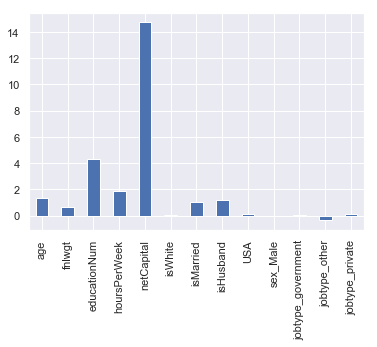

In [14]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(linear_.coef_)
weights = pd.Series(linear_.coef_[0],index=X.columns)
weights.plot(kind='bar')

In [7]:
def svm_perprocessing():
    # import dataset
    df = pd.read_csv("../cleanedAdultCensus.csv")

    #  consolidate capital gain/loss into a single net metric.
    df['netCapital'] = df['capitalGain']  - df['capitalLoss']

    # create new variable categorizes worked hours per week
    df.loc[df.hoursPerWeek > 40, "workhrs_"] = "overtime"
    df.loc[(df.hoursPerWeek <= 40) & (df.hoursPerWeek >= 30), "workhrs_"] = "fulltime"
    df.loc[(df.hoursPerWeek < 30 ) & (df.hoursPerWeek >= 20), "workhrs_"] = "partime"
    df.loc[df.hoursPerWeek < 20, "workhrs_"] = "limited"

    #maritalStatus_old = {'Widowed': 'separate', 'Divorced': 'separate', 'Separated': 'separate', 'Never-married': 'single', 'Married-civ-spouse': 'married', 'Married-spouse-absent': 'a_other', 'Married-AF-spouse': 'a_other'}
    #maritalStatus_ = {'Widowed': 'single', 'Divorced': 'single', 'Separated': 'single', 'Never-married': 'single', 'Married-civ-spouse': 'married', 'Married-spouse-absent': 'a_other', 'Married-AF-spouse': 'a_other'}
    #df['maritalStatus_'] = df.maritalStatus.map(lambda x: maritalStatus_[x])

    # compute the nearest 10 for person's decade birth
    #df['age_decade'] = (df.age // 10) * 10

    # one-hot encode `income` and race and maritalStatus, relationship, nativeCountry
    df.loc[df.income == "<=50K", 'income'] = 0 
    df.loc[df.income == ">50K", 'income'] = 1

    df.loc[df.race == "White", 'isWhite'] = 1
    df.loc[df.race != "White", 'isWhite'] = 0

    df.loc[df.maritalStatus == 'Married-AF-spouse', 'isMarried'] = 1
    df.loc[df.maritalStatus != 'Married-AF-spouse', 'isMarried'] = 0

    df.loc[df.relationship == 'Husband', 'isHusband'] = 1
    df.loc[df.relationship != 'Husband', 'isHusband'] = 0

    df.loc[df.nativeCountry == 'United-States', 'USA'] = 1
    df.loc[df.nativeCountry != 'United-States', 'USA'] = 0


    # drop unneeded columns
    #'educationNum','hoursPerWeek',
    unneeded_columns = ['workclass', 'education', 'maritalStatus','race',
                        'occupation', 'capitalGain', 'capitalLoss', 'nativeCountry', 'relationship',
                       'education_','workhrs_']
    df.drop(unneeded_columns, axis=1, inplace=True)



    categorical_variables =  ['sex', 'jobtype' ]
    for var in categorical_variables:
        category_list = 'var'+'_'+var
        category_list = pd.get_dummies(df[var], prefix=var, drop_first=True)
        _temp = df.join(category_list)
        df = _temp


    df.drop(categorical_variables, axis=1, inplace=True)
    #df.head()

    # list of all possible variables
    variables_ = df.columns.values.tolist()
    #variables_ = corr_matrix.index.tolist()
    variables_.remove("income")
    print("List of all posible variables")
    print(variables_)

    # define variables for classificaiton training
    y=df['income']
    X=df[variables_]

    print("")
    print("Summary Statistics for the Response Variable: `INCOME`")
    print("Average Income (Mean):  {:.3f}".format(y.mean()))
    print("Standard Deviation Income:  {:.3f}".format(y.std()))
    print("Mim Income:  {:.3f}".format(y.min()))
    print("Max Income:  {:.3f}".format(y.max()))
    
    return df, X, y

In [ ]:
linear_ = 